In [114]:
#Gerekli kütüphaneleri import ettim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

## Veri Hazırlama ve Veri Ön İşleme

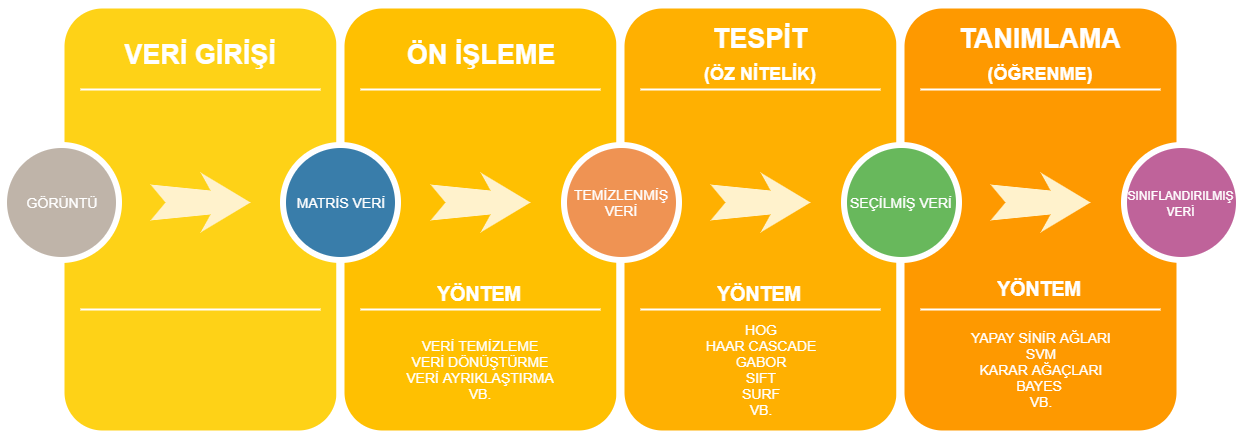

In [115]:
data=pd.read_csv("CO2_emission.csv")#Veri'yi hazırladım
data.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [116]:
data.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [117]:
data.isnull().sum()#Data'da boş değer olup olmadığını inceledim

Model_Year                                0
Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions                             0
Smog_Level                                0
dtype: int64

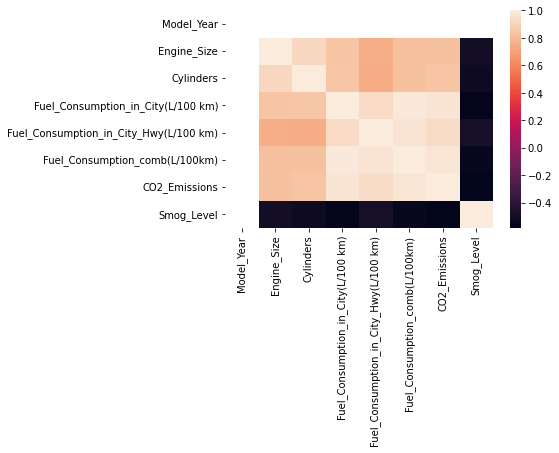

In [118]:
sbn.heatmap(data.corr());#Değişkenler arasındaki korelasyon;

In [119]:
print(data.Model_Year.unique())

[2021]


In [120]:
#Model yılı sütununda sadece bir unique değer olduğu için data'dan kaldırdım
data.drop("Model_Year",axis=1,inplace=True)

In [121]:
#Bazı sütunlara One Hot Encoder(OHE) Uyguladım
cap=["Model","Vehicle_Class","Make","Transmission"]
for i in cap:
    dum=pd.get_dummies(data[i])
    data=pd.concat([dum,data],axis=1)
    data.drop(i,axis=1,inplace=True)
data.head()

,A10,A6,A8,A9,AM6,AM7,AM8,AM9,AS10,AS5,...,Yukon XL 4WD (Without Stop-Start),Z4 M40i,Z4 sDrive30i,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,2.4,4,9.9,7.0,8.6,199,3
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,3.5,6,11.1,10.8,11.0,256,3
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2.0,4,11.0,8.6,9.9,232,6
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2.0,4,11.3,9.1,10.3,242,6
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2.0,4,11.2,8.0,9.8,230,7


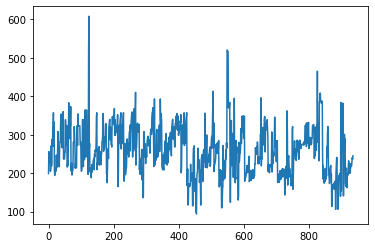

In [122]:
#CO2_Emissions sütununda bulunan değerler çizdirdim
plt.plot(data.CO2_Emissions);

## Model Oluşturma Ön Aşaması


In [123]:
x=data.drop("CO2_Emissions",axis=1)#Bağımsız değişken oluşturdum
y=data[["CO2_Emissions"]]#Bağımlı değişken oluşturdum
model=sm.OLS(y,x).fit().summary()#Model p-value değerlerini inceledim ve yüksek değerleri data'dan kaldırdım

In [124]:
#p-value değeri yüksek olan sütunları data'dan kaldırdım.
drop_cap=["Fuel_Consumption_in_City_Hwy(L/100 km)","Yukon XL","XT5 AWD","XT6 AWD","XT4 AWD","XC90 T6 AWD","XC60 T5 AWD","X7 M50i","Wrangler JL Unlimited 4X4 eTorque","Wrangler JL Unlimited 4X4 EcoDiesel","Wrangler JL 4X4 eTorque","Venue","Vantage V8","V60 T5","UX 250h AWD","Tucson","Trax 4WD (SIDI)","Traverse AWD","Transit Connect Van","Trailblazer","Titan 4WD Pro-4X","Titan 4WD","Tiguan","Tahoe","TT Coupe 45 TFSI quattro","Stelvio AWD","Sorento AWD","Sonata","Silverado Custom/WT","Silverado 4WD (Without AFM)","Silverado (Without DFM)","Sierra WT","Sierra 4WD (Without AFM)","S 580 4MATIC LWB Sedan","Renegade 4X4 Trailhawk"]
for i in drop_cap:
    data.drop(i,axis=1,inplace=True)
#Tekrarda bağımlı ve bağımsız değişkenleri tanımladım.
x=data.drop("CO2_Emissions",axis=1)
y=data[["CO2_Emissions"]]
#Eğitim ve Test kümelerini oluşturdum.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#                                    Model Oluşturma

Medium'da bulunan GridSearch ile ilgili olan blog yazım linki: https://medium.com/@ali3595k/machine-learning-gridsearchcv-nedir-ve-nas%C4%B1l-kullan%C4%B1l%C4%B1r-8c40a9e46041

## 'Decision Tree'

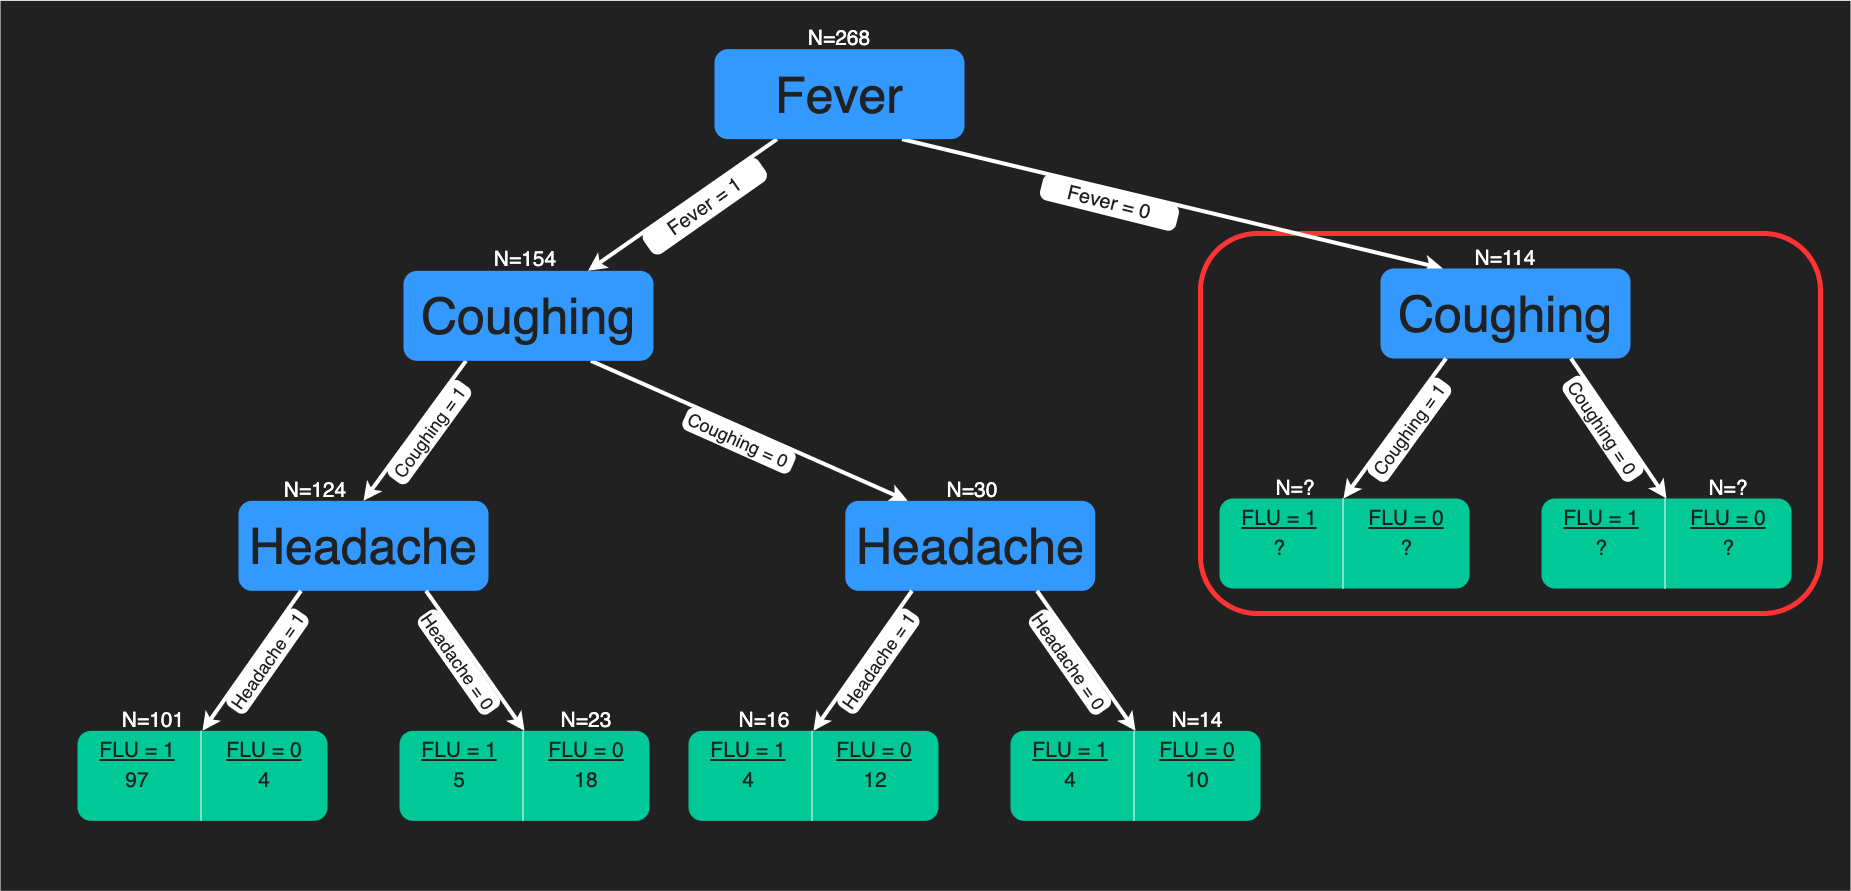

In [125]:
dc=DecisionTreeRegressor(random_state=42).fit(x_train,y_train.values.ravel())
print(r2_score(y_test,dc.predict(x_test)))

0.9412575481929619


In [126]:
test=x_test.iloc[0:5]
test_label=y_test.iloc[0:5]
test_label

,CO2_Emissions
321,310
70,225
209,306
549,520
712,206


In [127]:
pred=dc.predict(test)
pred=pd.DataFrame(pred,columns=["Tahmin"])
pred

,Tahmin
0,310.0
1,225.0
2,307.0
3,520.0
4,206.0


##  'Random Forest'

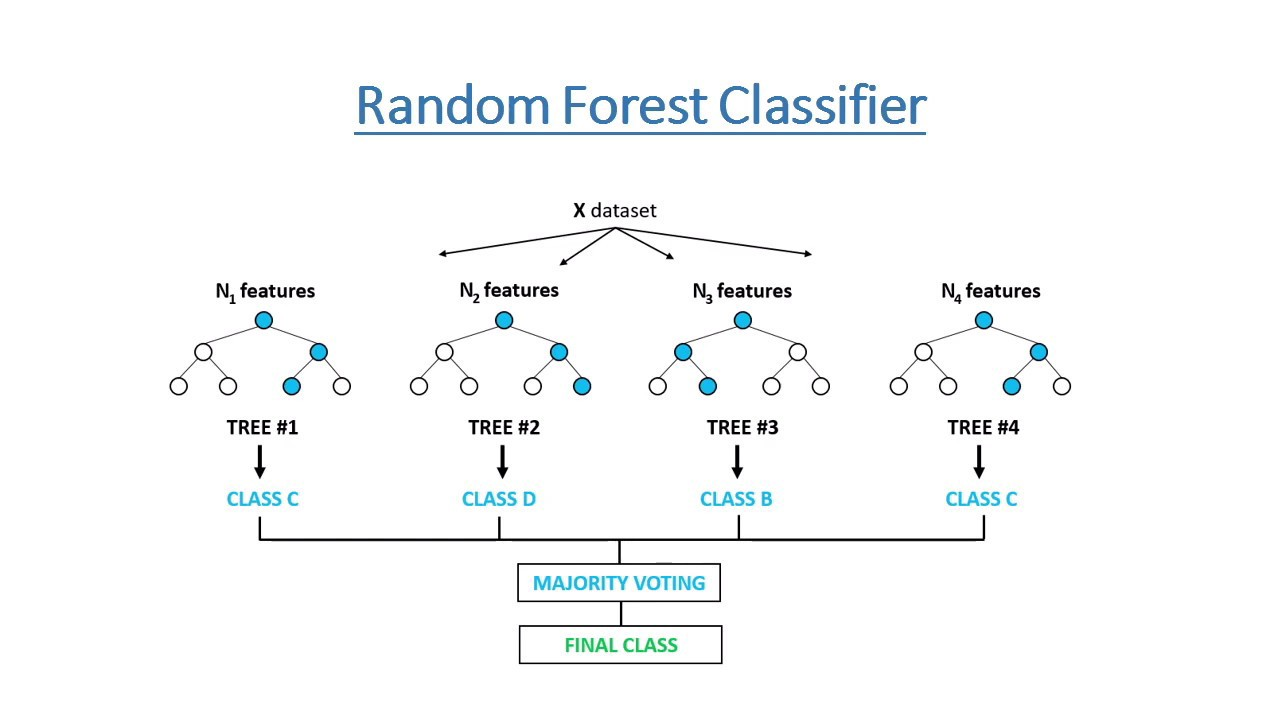

In [128]:
rf=RandomForestRegressor(random_state=42)
rf_params={"n_estimators":np.arange(1,50,1)}
gsv=GridSearchCV(rf,rf_params,cv=10,n_jobs=-1).fit(x_train,y_train.values.ravel())
gsv.best_params_#En iyi hiperparametre değerini göster

{'n_estimators': 44}

In [129]:
#Model oluşturma
rf=RandomForestRegressor(n_estimators=44,random_state=42).fit(x_train,y_train.values.ravel())
print(r2_score(y_test,rf.predict(x_test)))

0.9665149628278613


In [130]:
test=x_test.iloc[0:5]
test_label=y_test.iloc[0:5]
test_label

,CO2_Emissions
321,310
70,225
209,306
549,520
712,206


In [131]:
pred=rf.predict(test)
pred=pd.DataFrame(pred,columns=["Tahmin"])
pred

,Tahmin
0,309.295455
1,224.704545
2,307.022727
3,519.977273
4,205.863636


## 'XGBOOST'

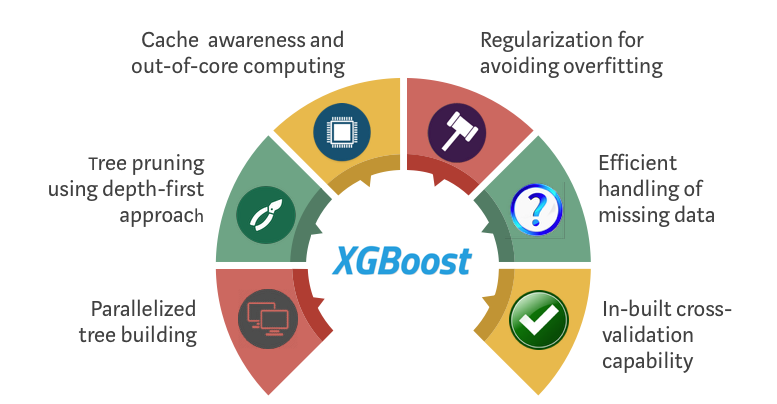

In [132]:
xg=XGBRegressor(random_state=42).fit(x_train,y_train.values.ravel())
print(r2_score(y_test,xg.predict(x_test)))

0.9721564640518647


In [133]:
test=x_test.iloc[0:5]
test_label=y_test.iloc[0:5]
test_label

,CO2_Emissions
321,310
70,225
209,306
549,520
712,206


In [134]:
pred=xg.predict(test)
pred=pd.DataFrame(pred,columns=["Tahmin"])
pred

,Tahmin
0,312.978455
1,224.872330
2,304.353180
3,518.349792
4,207.670792


## K-NN

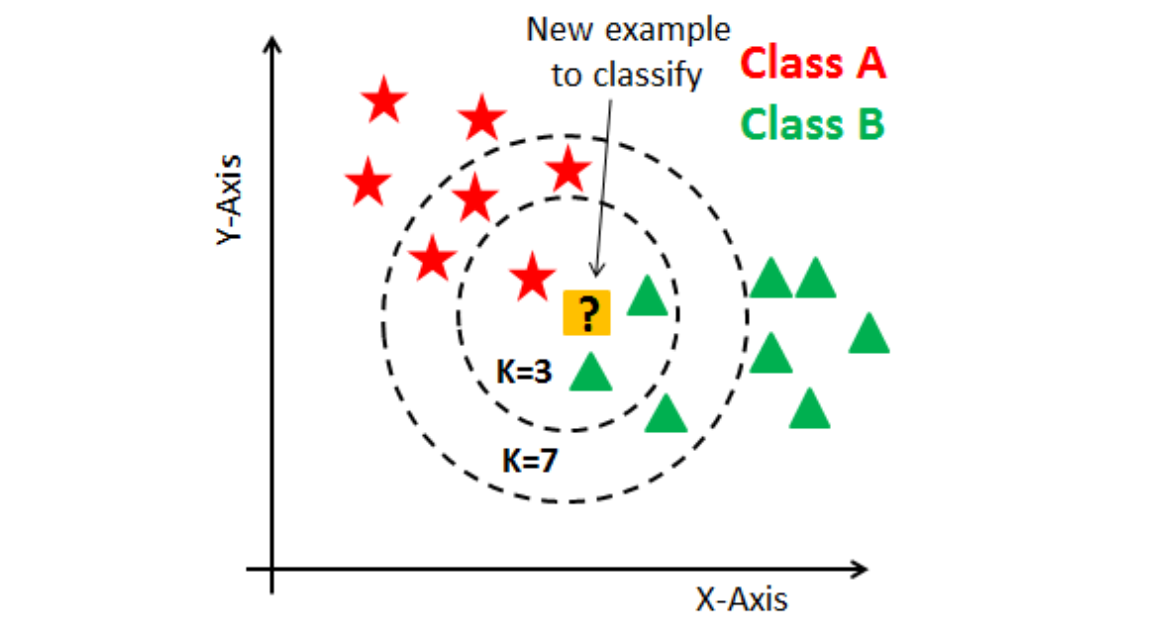

In [135]:
knn=KNeighborsRegressor()
knn_params={"n_neighbors":np.arange(1,50,1)}
gsv=GridSearchCV(knn,knn_params,cv=10,n_jobs=-1).fit(x_train,y_train.values.ravel())
gsv.best_params_#En iyi hiperparametre değerini göster

{'n_neighbors': 4}

In [136]:
knn=KNeighborsRegressor(n_neighbors=4).fit(x_train,y_train.values.ravel())
print(r2_score(y_test,knn.predict(x_test)))

0.9633214151717348


In [137]:
test=x_test.iloc[0:5]
test_label=y_test.iloc[0:5]
test_label

,CO2_Emissions
321,310
70,225
209,306
549,520
712,206


In [138]:
pred=knn.predict(test)
pred=pd.DataFrame(pred,columns=["Tahmin"])
pred

,Tahmin
0,304.00
1,214.25
2,313.25
3,518.00
4,204.75


# 4 Modelin Sonucu

In [139]:
data=[0.9412575481929619,0.9665149628278613,0.9721564640518647,0.9633214151717348]
pd.DataFrame(data,index=["Decision Tree","Random Forest","XGBOOST","KNN"])

,0
Decision Tree,0.941258
Random Forest,0.966515
XGBOOST,0.972156
KNN,0.963321


Tahmin sonucu en yüksek oranla: XGBOOST


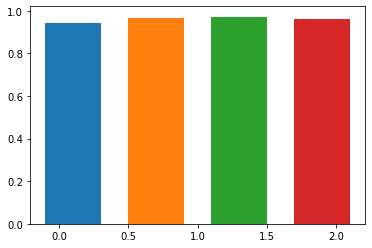

In [140]:
class_names = ["Decision Tree","Random Forest","XGBOOST","KNN"]
ind = 0.1+0.6*np.arange(len(class_names))
width = 0.4  
for i in range(len(class_names)):
    plt.bar(ind[i], data[i], width)
print("Tahmin sonucu en yüksek oranla:", class_names[np.argmax(data)])